In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
image_dir = Path('/Users/davemag9/Desktop/Diploma/food20dataset/train_set')

In [4]:
filepaths = list(image_dir.glob(r"**/*.jpg"))
os.path.split(os.path.split(filepaths[0])[0])

('/Users/davemag9/Desktop/Diploma/food20dataset/train_set', 'vada pav')

In [5]:
labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1], filepaths))

In [6]:
filepaths = pd.Series(filepaths, name="FilePath")
labels = pd.Series(labels, name="Label")

images = pd.concat([filepaths, labels], axis=1)
# images = images.iloc[:len(images) // 2].reset_index(drop=True)


In [7]:
images

,FilePath,Label
0,/Users/davemag9/Desktop/Diploma/food20dataset/...,vada pav
1,/Users/davemag9/Desktop/Diploma/food20dataset/...,vada pav
2,/Users/davemag9/Desktop/Diploma/food20dataset/...,vada pav
3,/Users/davemag9/Desktop/Diploma/food20dataset/...,vada pav
4,/Users/davemag9/Desktop/Diploma/food20dataset/...,vada pav
...,...,...
1063,/Users/davemag9/Desktop/Diploma/food20dataset/...,halwa
1064,/Users/davemag9/Desktop/Diploma/food20dataset/...,halwa
1065,/Users/davemag9/Desktop/Diploma/food20dataset/...,halwa
1066,/Users/davemag9/Desktop/Diploma/food20dataset/...,halwa


In [8]:
category_sample = []
for category in images['Label'].unique():
    category_slice = images.query("Label == @category")
    category_sample.append(category_slice.sample(len(category_slice), random_state = 1))
image_df = pd.concat(category_sample, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [9]:
image_df

,FilePath,Label
0,/Users/davemag9/Desktop/Diploma/food20dataset/...,chaat
1,/Users/davemag9/Desktop/Diploma/food20dataset/...,ven pongal
2,/Users/davemag9/Desktop/Diploma/food20dataset/...,gulab jamun
3,/Users/davemag9/Desktop/Diploma/food20dataset/...,tandoori chicken
4,/Users/davemag9/Desktop/Diploma/food20dataset/...,chaat
...,...,...
1063,/Users/davemag9/Desktop/Diploma/food20dataset/...,tandoori chicken
1064,/Users/davemag9/Desktop/Diploma/food20dataset/...,chappati
1065,/Users/davemag9/Desktop/Diploma/food20dataset/...,noodles
1066,/Users/davemag9/Desktop/Diploma/food20dataset/...,paniyaram


In [10]:
image_df['Label'].value_counts()

Label
idly                70
dosa                70
butternaan          70
biriyani            70
meduvadai           70
gulab jamun         67
chaat               65
ven pongal          53
dhokla              51
kathi roll          50
noodles             50
chappati            50
poori               49
tandoori chicken    49
vada pav            49
halwa               48
paniyaram           46
bisibelebath        46
samosa              45
Name: count, dtype: int64

In [11]:
# train_df, val_df = train_test_split(image_df, train_size = 0.9, shuffle=True, random_state=1)

In [12]:
image_dir = Path('/Users/davemag9/Desktop/Diploma/food20dataset/test_set')

filepaths = list(image_dir.glob(r"**/*.jpg"))
os.path.split(os.path.split(filepaths[0])[0])

labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name="FilePath")
labels = pd.Series(labels, name="Label")

images = pd.concat([filepaths, labels], axis=1)
# images = images.iloc[:len(images) // 2].reset_index(drop=True)

category_sample = []
for category in images['Label'].unique():
    category_slice = images.query("Label == @category")
    category_sample.append(category_slice.sample(len(category_slice), random_state = 1))
test_df = pd.concat(category_sample, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [13]:
test_df, val_df = train_test_split(test_df, train_size = 0.4, shuffle=True, random_state=1)
train_df = image_df

In [14]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [15]:
train_df['FilePath'] = train_df['FilePath'].astype(str)
test_df['FilePath'] = test_df['FilePath'].astype(str)
val_df['FilePath'] = val_df['FilePath'].astype(str)

In [16]:
train_images = train_gen.flow_from_dataframe(
    dataframe=train_df,
    x_col="FilePath",
    y_col="Label",
    target_size=(224, 224),  # Resize images to 224x224 (MobileNetV2 input size)
    color_mode="rgb",  # Images are in RGB
    class_mode="categorical",  # Multi-class classification (categorical labels)
    batch_size=32,  # Number of images per batch
    shuffle=True,  # Shuffle the data
    seed=42,  # Set a seed for reproducibility
    subset="training"  # Use the training subset of the data (80%)
)

# val_images = train_gen.flow_from_dataframe(
#     dataframe=test_df,
#     x_col="FilePath",
#     y_col="Label",
#     target_size=(224, 224),
#     color_mode="rgb",
#     class_mode="categorical",
#     batch_size=32,
#     subset="validation" # Don't shuffle the test data
# )

val_images = train_gen.flow_from_dataframe(
    dataframe=val_df,
    x_col="FilePath",
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset="validation" # Don't shuffle the test data
)

# Create the test generator
test_images = test_gen.flow_from_dataframe(
    dataframe=test_df,
    x_col="FilePath",
    y_col="Label",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False,# Don't shuffle the test data
)

Found 855 validated image filenames belonging to 19 classes.
Found 66 validated image filenames belonging to 19 classes.
Found 220 validated image filenames belonging to 19 classes.


In [17]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = "imagenet",
    pooling = "avg"
)
pretrained_model.trainable = False

In [18]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation = "relu")(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation = "relu")(x)

# outputs = tf.keras.layers.Dense(len(images) // 50, activation="softmax")(x)
outputs = tf.keras.layers.Dense(19, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,440,915 (9.31 MB)

 Trainable params: 182,931 (714.57 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [19]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

history = model.fit(
    train_images,
    validation_data = val_images,
    epochs = 100,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = "val_loss",
            patience = 3,
            restore_best_weights = True
        )
    ]
)

/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 22s 727ms/step - accuracy: 0.1843 - loss: 2.6450 - val_accuracy: 0.5606 - val_loss: 1.4796
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 672ms/step - accuracy: 0.7477 - loss: 1.0234 - val_accuracy: 0.7424 - val_loss: 0.8177
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 711ms/step - accuracy: 0.8547 - loss: 0.4835 - val_accuracy: 0.8333 - val_loss: 0.4864
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 751ms/step - accuracy: 0.9530 - loss: 0.2210 - val_accuracy: 0.8939 - val_loss: 0.4135
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 685ms/step - accuracy: 0.9872 - loss: 0.1195 - val_accuracy: 0.9091 - val_loss: 0.3317
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 685ms/step - accuracy: 0.9942 - loss: 0.0668 - val_accuracy: 0.8788 - val_loss: 0.4228
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 701ms/step - accuracy: 0.9958 - loss: 0.0503 - val_accuracy: 0.9091 - val_loss: 0.2947
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 696ms/step - accuracy: 1.0000 - loss: 0.0249 - 

In [20]:
results = model.evaluate(test_images, verbose=0)
print("Test accuracy: {:.2f}%".format(results[1] * 100))

/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test accuracy: 85.91%


In [21]:
# Get class predictions (indices of the highest probability class)
predictions = np.argmax(model.predict(test_images), axis=1)

# True labels from the test generator
true_labels = test_images.labels

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Compute classification report
clr = classification_report(true_labels, predictions, )

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 761ms/step


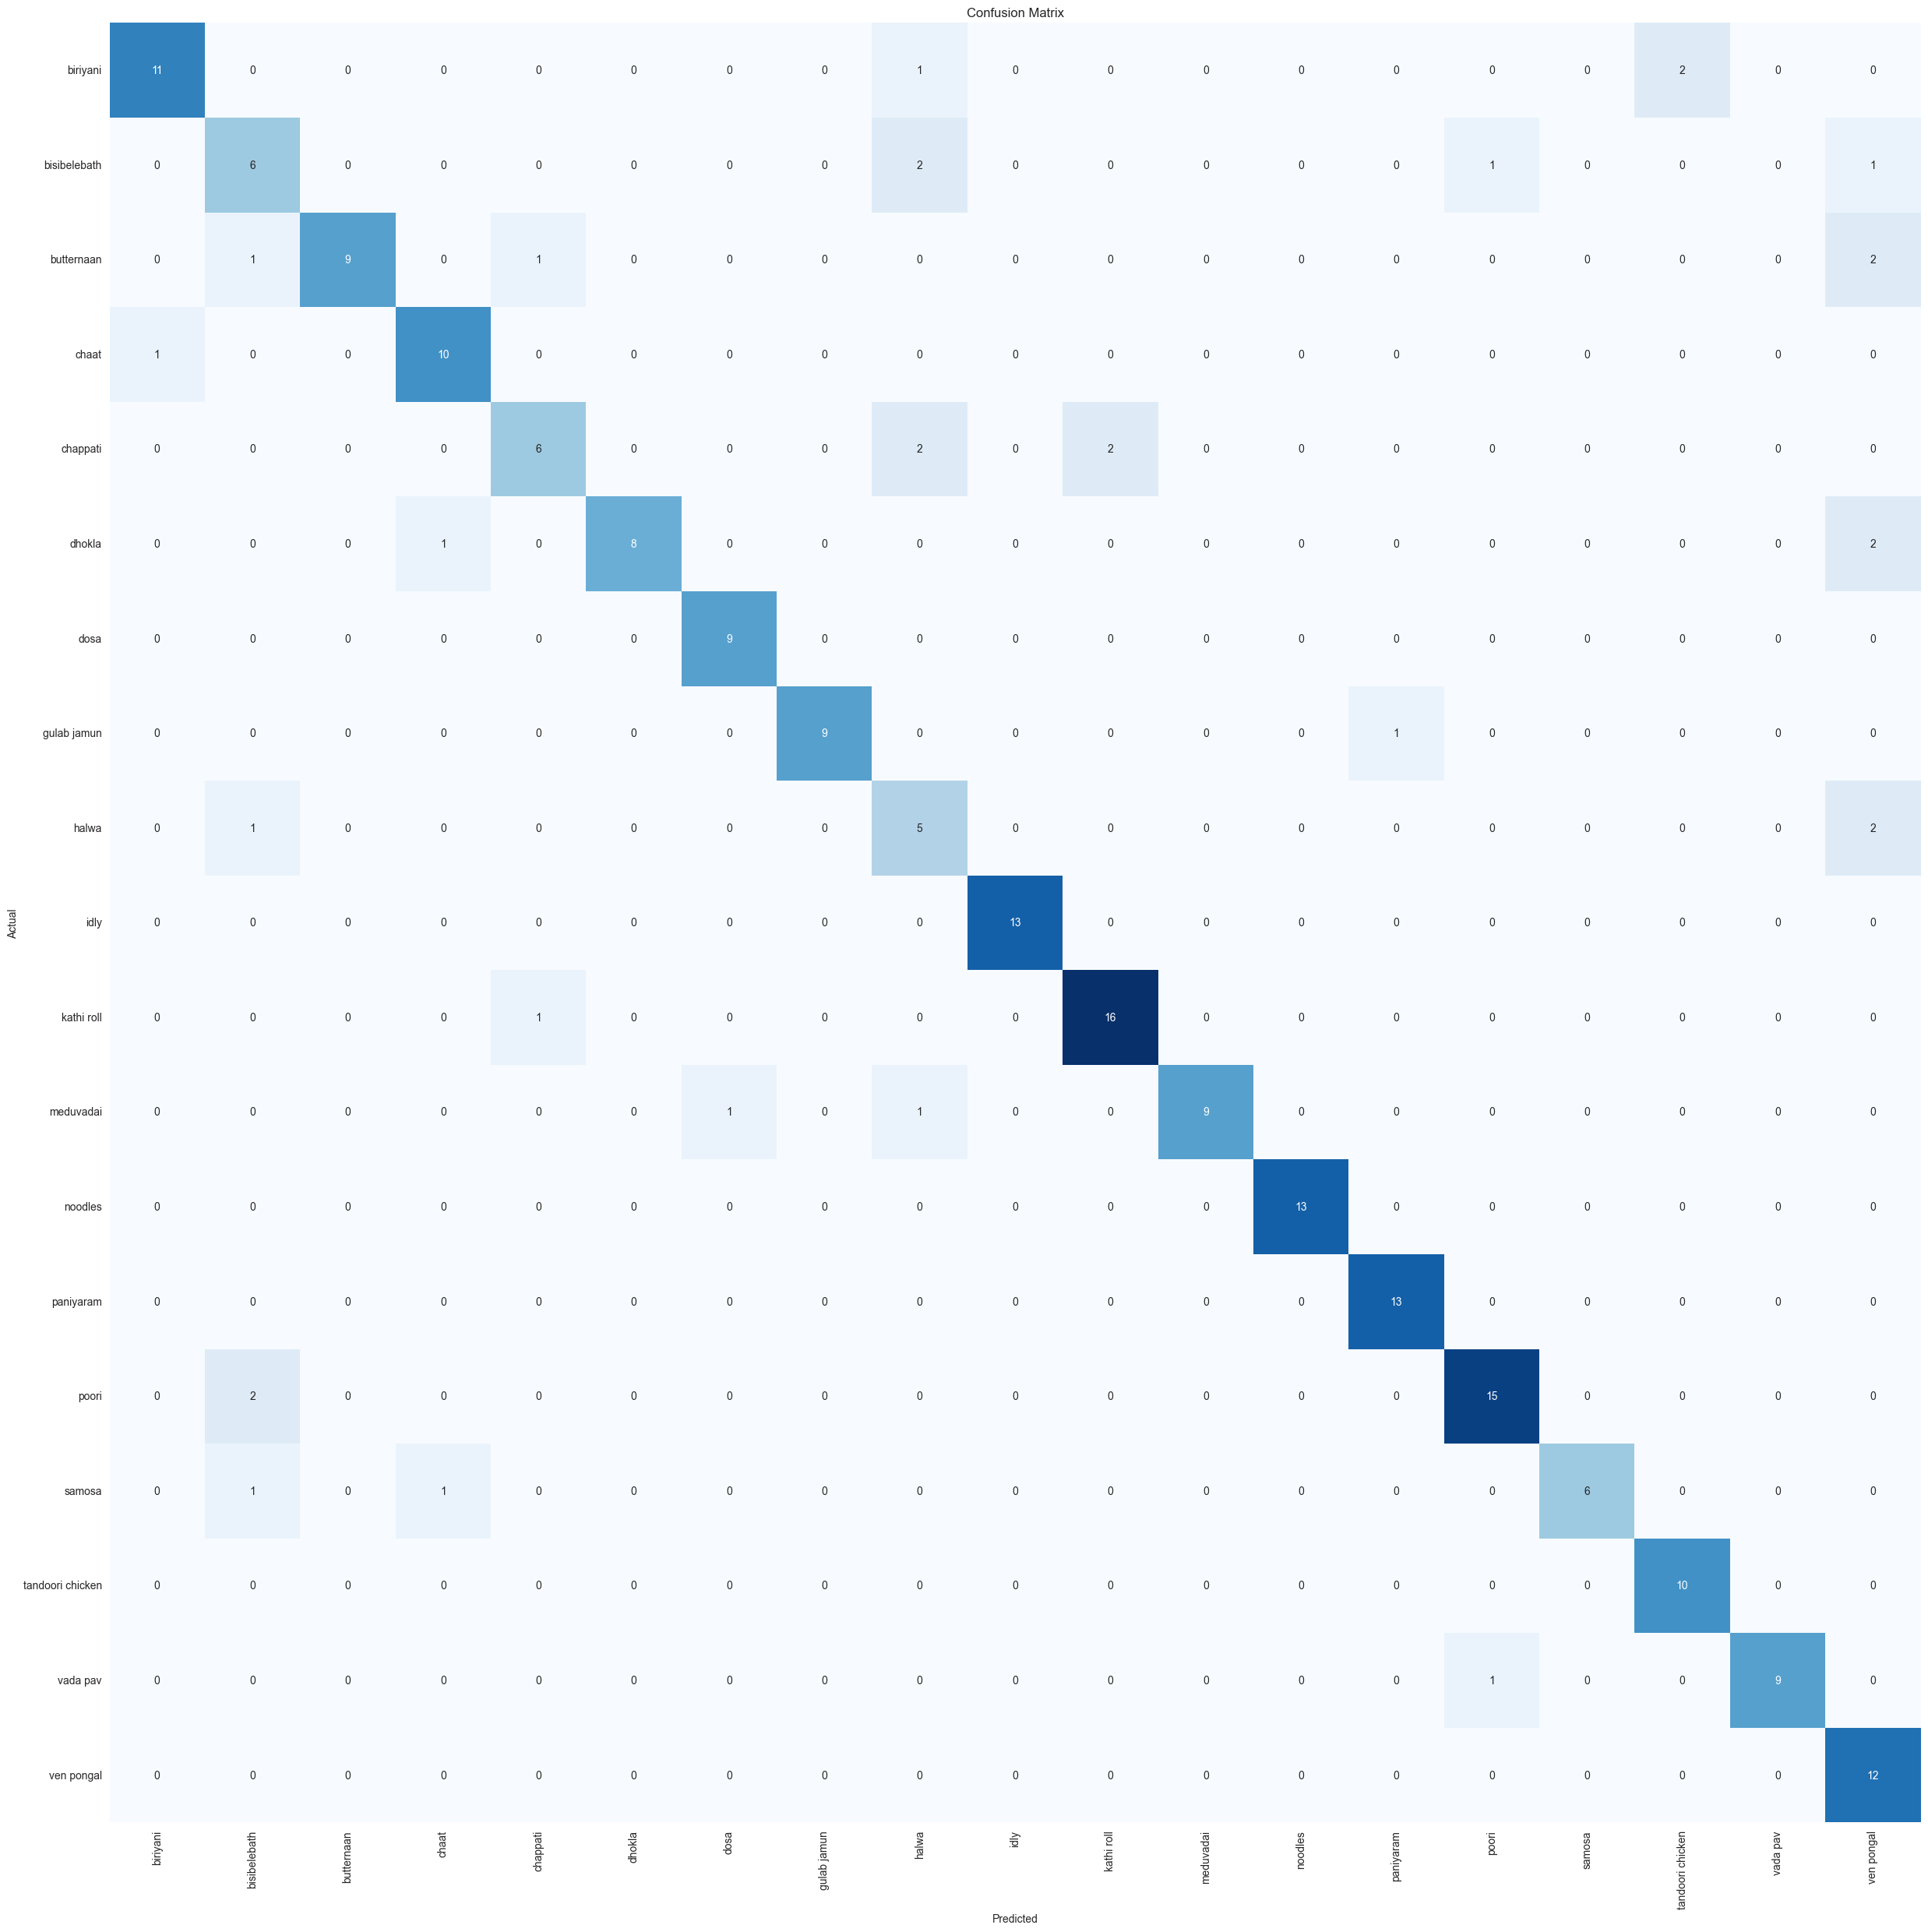

Classification Report:
-------------------------
               precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.55      0.60      0.57        10
           2       1.00      0.69      0.82        13
           3       0.83      0.91      0.87        11
           4       0.75      0.60      0.67        10
           5       1.00      0.73      0.84        11
           6       0.90      1.00      0.95         9
           7       1.00      0.90      0.95        10
           8       0.45      0.62      0.53         8
           9       1.00      1.00      1.00        13
          10       0.89      0.94      0.91        17
          11       1.00      0.82      0.90        11
          12       1.00      1.00      1.00        13
          13       0.93      1.00      0.96        13
          14       0.88      0.88      0.88        17
          15       1.00      0.75      0.86         8
          16       0.83      1.

In [22]:
plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
# plt.xticks(ticks=np.arange(len(images) // 50) + 0.5, labels=test_images.class_indices, rotation=90)
# plt.yticks(ticks=np.arange(len(images) // 50) + 0.5, labels=test_images.class_indices, rotation=0)
plt.xticks(ticks=np.arange(19) + 0.5, labels=test_images.class_indices, rotation=90)
plt.yticks(ticks=np.arange(19) + 0.5, labels=test_images.class_indices, rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n-------------------------\n", clr)